In [1]:
%jsroot on // To activate the interactive display of the histograms we can use the JSROOT magic

In [2]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",900, 600); //este es comodin, por si queremos dibujar algo
c1->SetGrid();
gStyle->SetPalette(1); //opcional: cambia la paleta de colores en los plots. 

In [4]:
Float_t fSig = 0.7; // Fracción de señal.
Int_t nEntries = 20; // Número de entradas.
Float_t minVal = 110.000; //Valor mínimo del intervalo.
Float_t maxVal = 135.000; //Valor máximo del intervalo.

In [5]:
Int_t n = 7;
Int_t nbins = 7;
TH1D *h_data = new TH1D("h_data","h_data",n,minVal,maxVal); // Histograma de datos.

// Para 7:
if (n == 7) {  
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 1);
    h_data->SetBinContent(4, 6);
    h_data->SetBinContent(5, 4);
    h_data->SetBinContent(6, 0);
    h_data->SetBinContent(7, 2);
}

In [7]:
//PDF de la señal, más info: https://root.cern.ch/root/html524/TMath.html#TMath:Gaus
//signalModel = new TF1("signalModel","[2]*TMath::Landau(x,[0],[1],1)",minVal,maxVal);
//signalModel = new TF1("signalModel","[2]*TMath::Gaus(x,[0],[1],1)",minVal,maxVal);
signalModel = new TF1("signalModel","[2]*TMath::BreitWigner(x,[0],[1])",minVal,maxVal);
signalModel->SetParNames("mass","sigma"); //nombres de los parámetros
signalModel->SetParameters(123.8,5.35,1); //valores de los parámetros
//signalModel->FixParameter(0,123.8);

Y ahora, los combinamos y hacemos el ajuste de los parámetros.

Minval: 3.64248

****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      3.64248
Chi2                      =      3.81851
NDf                       =            4
Edm                       =   4.9706e-07
NCalls                    =          159
mass                      =      123.835   +/-   0.841637    
sigma                     =      5.34602   +/-   2.91281     
p2                        =      58.6465   +/-   15.9213     

Covariance Matrix:

            	        mass       sigma          p2
mass        	     0.70835    -0.39948     0.81726
sigma       	    -0.39948      8.4845      7.0733
p2          	     0.81726      7.0733      253.49

Correlation Matrix:

            	        mass       sigma          p2
mass        	           1    -0.16295     0.06099
sigma       	    -0.16295           1     0.15252
p2          	     0.06099     0.15252           1


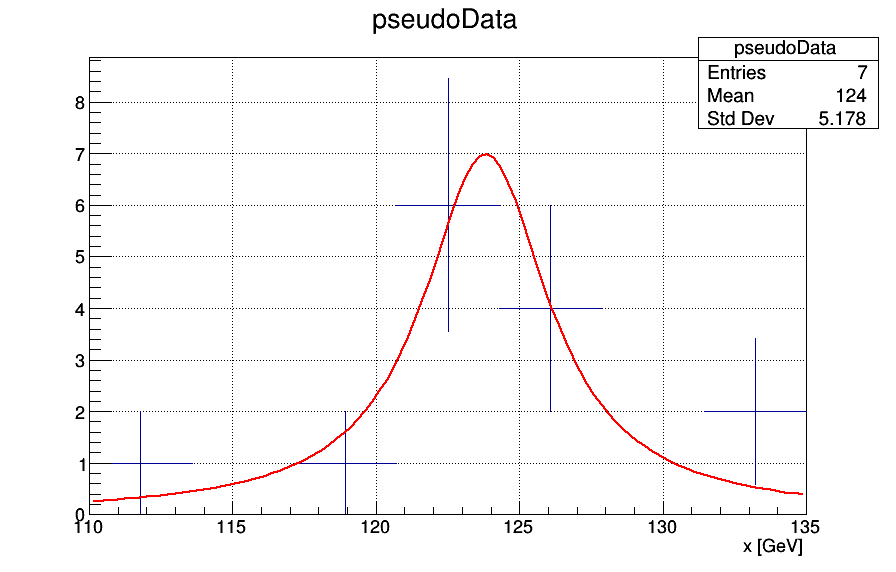

In [8]:
c1->cd();

pseudoData =  new TH1D("pseudoData","pseudoData",nbins, minVal,maxVal);
pseudoData->GetXaxis()->SetTitle("x [GeV]");
// pseudoData->GetYaxis()->SetTitle("Entries / {} GeV".format((maxVal-minVal)/nbins)); /////////////Preguntar
pseudoData->Add(h_data);
pseudoData->Draw("e");

r = pseudoData->Fit("signalModel",  "LQS", "", minVal, maxVal); // L: likelihood, Q: quiet, reduce printing, S: save fit result 

cout << "Minval: " << r->MinFcnValue() << endl ;
r->Print("v");

c1->Draw();

Primero creamos un histograma bidimensional

In [9]:
Float_t stepMass = 0.5;
Float_t stepWidth = 0.25;
binMass = int((maxVal-minVal)/stepMass);
binWidth = int(10./stepWidth);
chi2dPlot = new TH2D("chi2dPlot","chi2dPlot",binMass,minVal-stepMass/2.0,maxVal-stepMass/2.0,binWidth,0.5,10.5);

cout << "binMass: " << binMass << endl;
cout << "binWidth: " << binWidth << endl;

binMass: 50
binWidth: 40


Luego realizamos ajustes fijando tanto la masa como la anchura, de forma que nos permitan obtener el $\chi^{2}$ en función de dichos parámetros. Sin fijarlos, obtendríamos siempre el valor que más se ajuste a los datos (en el mínimo!).  

In [10]:
//this is for the chi2 on the mass and width
chi2dPlot->Clear();
for (Float_t masses = minVal; masses < maxVal; masses+=stepMass){
    //cout << "Filling: externo mass: "<< masses << ". bin:" << chi2dPlot->GetXaxis()->FindBin(masses) << endl;
    for (double widths = 0.25; widths < 10.5; widths+=stepWidth){
        //cout << "Filling: interno mass and bin: " << widths << chi2dPlot->GetYaxis()->FindBin(widths) << endl;
        
        for (Int_t i=0; i<2; i++) signalModel->ReleaseParameter(i);
        signalModel->FixParameter(0,masses);
        signalModel->FixParameter(1,widths);
        r = pseudoData->Fit("signalModel","QLS");
        chi2dPlot->SetBinContent(chi2dPlot->FindBin(masses,widths),r->MinFcnValue());
    }
}

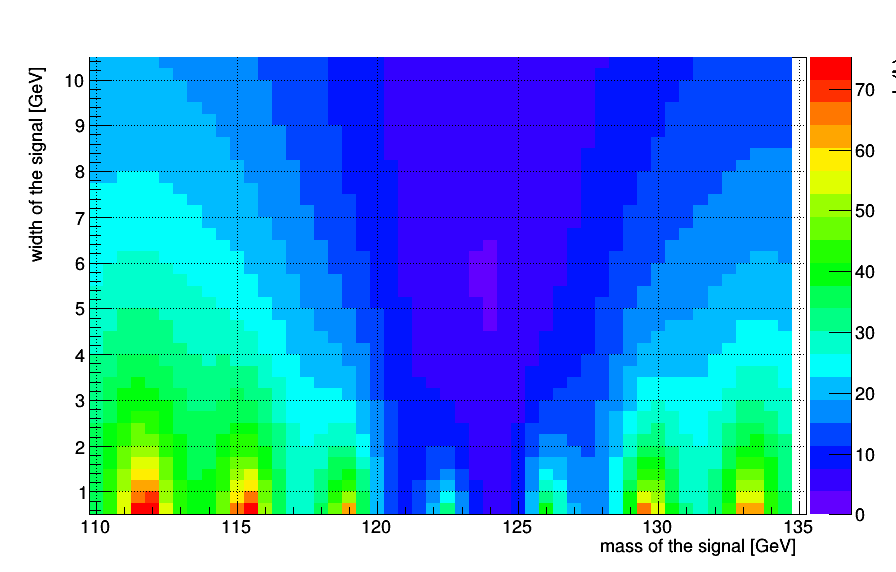

In [11]:
//remove borders..
//chi2dPlot->SetAxisRange(0.5,10,"y");
//chi2dPlot->SetAxisRange(0,20,"z");
chi2dPlot->SetAxisRange(110,135,"x");
chi2dPlot->GetXaxis()->SetTitle("mass of the signal [GeV]");
chi2dPlot->GetYaxis()->SetTitle("width of the signal [GeV]");
chi2dPlot->GetZaxis()->SetTitle("ln(L)");
chi2dPlot->Draw("colz");
gStyle->SetOptStat(000000);
c1->Draw();

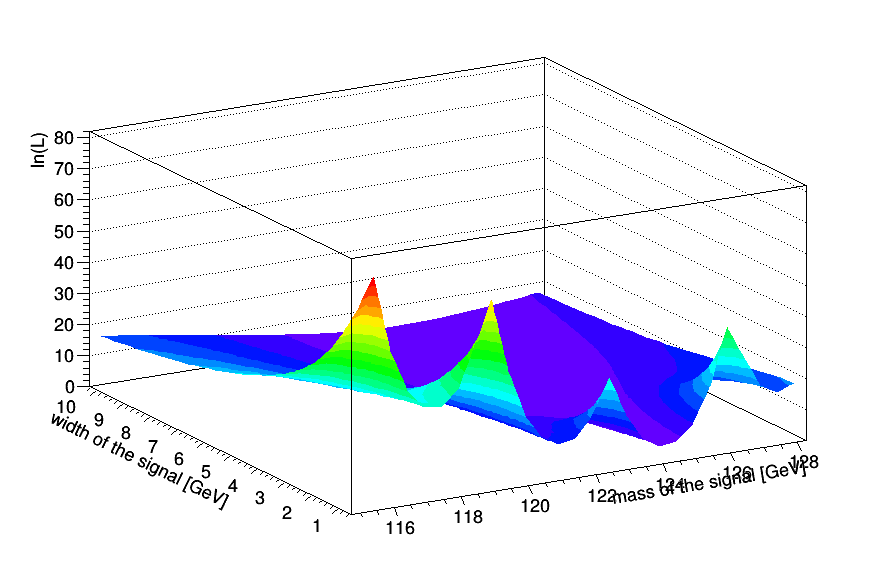

In [12]:
// remove borders..
chi2dPlot->SetAxisRange(0.5,10,"y");
chi2dPlot->SetAxisRange(115,128,"x");
chi2dPlot->GetXaxis()->SetTitle("mass of the signal [GeV]");
chi2dPlot->GetYaxis()->SetTitle("width of the signal [GeV]");
chi2dPlot->GetZaxis()->SetTitle("ln(L)");
chi2dPlot->Draw("surf2");
gStyle->SetOptStat(000000);
c1->Draw();